In [44]:
from delta_surface import *
from concurrent.futures import ThreadPoolExecutor

8

In [2]:
test = delta_suface(['TSLA', 'AAPL', 'MSFT'])

In [3]:
#test = delta_suface(['AAPL', 'TSLA'])

In [4]:
test.get_px()

[*********************100%***********************]  3 of 3 completed


In [5]:
test.poly_chain()

In [6]:
test.poly_parse()

In [7]:
test.iv_calcs()

In [47]:
test.hist_poly_thread(thread_count=16)

,v,vw,o,c,h,l,t,n,ticker,date
0,1.0,177.4200,177.42,177.42,177.42,177.42,1.684469e+12,1.0,O:TSLA230616C00001670,2023-05-19
1,9.0,185.8911,186.22,185.85,186.22,185.85,1.684814e+12,5.0,O:TSLA230616C00001670,2023-05-23
2,19.0,183.0658,184.15,182.25,184.15,182.00,1.684987e+12,7.0,O:TSLA230616C00001670,2023-05-25
3,2.0,195.6300,195.63,195.63,195.63,195.63,1.685506e+12,1.0,O:TSLA230616C00001670,2023-05-31
4,2.0,213.5700,213.57,213.57,213.57,213.57,1.685678e+12,1.0,O:TSLA230616C00001670,2023-06-02
...,...,...,...,...,...,...,...,...,...,...
4350,499.0,0.0203,0.03,0.02,0.03,0.02,1.685419e+12,44.0,O:MSFT230616C00520000,2023-05-30
4351,5.0,0.0100,0.01,0.01,0.01,0.01,1.685506e+12,3.0,O:MSFT230616C00520000,2023-05-31
4352,16.0,0.0100,0.01,0.01,0.01,0.01,1.685592e+12,2.0,O:MSFT230616C00520000,2023-06-01
4353,2.0,0.0200,0.02,0.02,0.02,0.02,1.686024e+12,1.0,O:MSFT230616C00520000,2023-06-06


In [22]:
test.delta_curve(sf = 0.1)

In [23]:
test.curve_df

,TSLA,AAPL,MSFT
0.50,0.906329,0.979212,0.983259
0.51,0.902114,0.979212,0.983259
0.52,0.897982,0.979212,0.983259
0.53,0.893961,0.979212,0.983259
0.54,0.890075,0.979212,0.983259
...,...,...,...
1.46,0.000000,0.000000,0.000000
1.47,0.000000,0.000000,0.000000
1.48,0.000000,0.000000,0.000000
1.49,0.000000,0.000000,0.000000


When we reach max or min for first time outwith 50d, maybe we stick to 0/1 from there

In [24]:
vol_df = test.delta_df[test.delta_df['ticker'] == 'MSFT'].sort_values('strike')

In [25]:
x = test.curve_df.index
y = test.curve_df['MSFT']

x_init = vol_df['k_norm']
y_init = vol_df['pv_delta']

x_new = np.arange(0.5,1.51,0.01)

In [26]:
from scipy import interpolate

In [40]:
spl = interpolate.UnivariateSpline(x, y)
spl.set_smoothing_factor(0.075)

In [41]:
y_new = pd.DataFrame(spl(x_new)).cummin()[::-1].cummax()[::-1]
y_new.clip(lower = 0, upper = 1, inplace = True)

In [42]:
import matplotlib.pyplot as plt

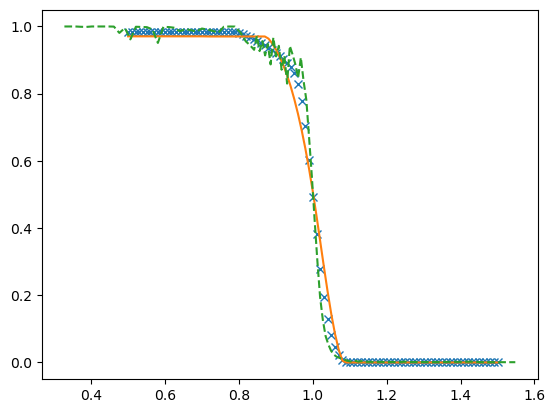

In [43]:
plt.plot(x, y, 'x', x_new, y_new, '-', x_init, y_init, '--')